In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize 
from scipy.io import loadmat

input_layer_size=400 #Each picture is 20x20 pixels

# Want to identify digits from 0 to 9
num_labels= 10

#  training data stored in arrays X, y
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y'].ravel()  #Ravel function is used to create a continuous flattened array

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.shape[0] #No. of training examples
n= X.shape[1] #No. of parameters

y.resize(m,1)

In [3]:
#print(type(X),type(y)) To confirm data type of X,y they are python arrays
print(X[2500][35],y[500])

0.00023403458605664485 [1]


In [4]:
#Don't know the logic behind it just copied it from the Python Version of the Assignment in Exercise3/utils.py

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

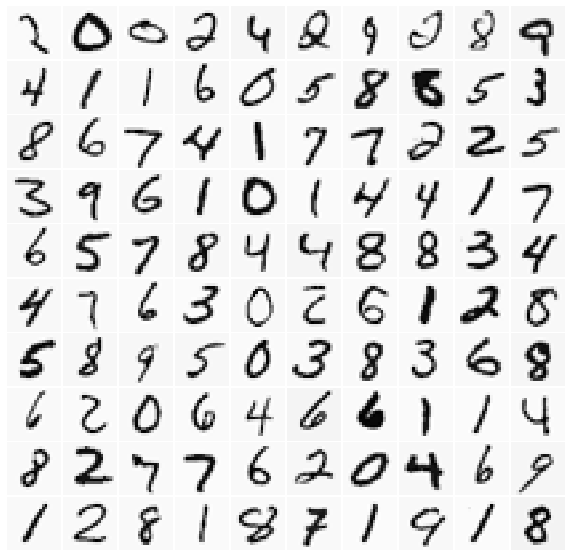

In [5]:
#Visualizing the data
randindices=np.random.choice(m,100,replace=False)
displayData(X[randindices,:])

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def lrCostFunction(theta, X, y, lambda_):
    m=len(y)
    
    h=sigmoid(np.matmul(X, theta)) #Hypothesis
    J= -sum(y*np.log(h) + (1-y)*np.log(1-h))/m + lambda_/(2*m) * sum(theta[1:]**2) #Cost Function
    
    # compute gradient
    j_0= 1/m * np.matmul(X.transpose(), h-y)[0]
    j_1 = 1/m * np.matmul(X.transpose(), h - y)[1:] + (lambda_/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return J, grad

In [8]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = lrCostFunction(theta_t, X_t, y_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: [2.5348194] Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [9]:
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    J_history=[]
    for i in range(num_iters):
        J, grad= lrCostFunction(theta, X, y, lambda_)
        theta= theta -alpha*grad
        J_history.append(J)
        
    return J_history, theta       

In [10]:
def oneVsAll(X,y, num_labels, lambda_):
    """
    We need to create and train the amount of logical classifiers equal to the no. of labels and return the optimisded value
    of the theta vectors for each label into a matrix where the ith row gives the row vector who's elements are the parameters
    for the ith label.
     """
    
    alltheta= [] #n parameters + 1 bias paramter
    allJ=[]
    initial_theta=np.zeros((n+1,1))
    X=  np.insert(X,0,1,axis=1) #Adding a column of ones to account for the Bias parameter
    
    for i in range(10):
        J_history, theta= gradientDescent(X, np.where(y==i,1,0), initial_theta, 1, 300, lambda_ )
        alltheta.extend(theta)
        allJ.extend(J_history)
                
    return np.array(alltheta).reshape(num_labels,n+1), allJ

In [11]:
#X[2500][35]
lambda_=0.5
#print(y[4999])
alltheta, allJ= oneVsAll(X, y, num_labels, lambda_)

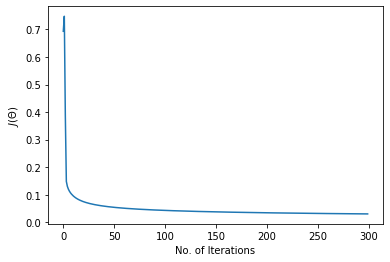

In [12]:
#PLOTTING COST FUNCTION
plt.plot(allJ[0:300])
plt.xlabel('No. of Iterations')
plt.ylabel("$J(\Theta)$")
plt.show()

In [13]:
print(alltheta.shape)

(10, 401)


In [14]:
def predictOneVsAll(alltheta, X):
    X=np.insert(X,0,1,axis=1)# dim(X)=m x n + 1, dim(alltheta)=  10 x n+1 
        
    # np.matmul(np.transpose(alltheta), X) = Prediction matrix of dimension m x 10
    
    p= np.matmul(X, np.transpose(alltheta)) #the result is a tuple with first the array of all 
                                        #row indices and then array of all column indices of 1s
        
    return np.argmax(p,axis=1)

In [15]:
pred= predictOneVsAll(alltheta, X).reshape(m,1)
print(pred[4998,:])
print('Accuracy =', np.mean(pred==y)*100,'%')

[9]
Accuracy = 91.44 %


# NEURAL NETWORKS:
## forward propogation only.


In [16]:
#SETUP
#ORIGINAL DATA IS THE SAME!
input_layer_size=400 #Images are 20x20 pixels, so 400 pixels
hidden_layer_size=25
output_layer_size=10 #Corresponding to the 10 digits

weights=loadmat('ex3weights.mat')
Theta1, Theta2= weights['Theta1'], weights['Theta2']  #dim(Theta1)= 25 x 401  dim(Theta2)= 10 x 26

#Will cyclically arrange/ shift each row, Rolling is done as MATLAB indexing starts from 1
Theta2= np.roll(Theta2, 1,axis=0)

print(Theta1.shape, Theta2.shape)

(25, 401) (10, 26)


In [17]:
def predict(Theta1, Theta2, X):
    #have to make predictions for all the image examples
    
    if X.ndim==1:
        X= X[None] #If input vector only has one dimension, promote it to a two dimensional vector
    #can also write np.newaxis instead of none     
   
    m= X.shape[0]
    p=np.zeros(m)
    X= np.insert(X,0,1, axis=1) #X is now updated with ones
    
    a2= sigmoid(np.matmul(Theta1, X.transpose()))   #z2=Theta1 * X  a2= sigmoid(z2) a2=activation matrix of layer 2
    #dim(a2)= 25 x 5000 one activation layer for each example
    a2= np.insert(a2,0,1, axis=0) #To update a2 with bias units. new dim(a2)= 26 x 5000
    a3=sigmoid(np.matmul(Theta2, a2))
    
    p=np.argmax(a3, axis=0)
    
    return p

In [18]:
pred=predict(Theta1, Theta2, X).reshape(m,1)
print('Accuracy=', np.mean(pred==y)*100,'%')

Accuracy= 97.52 %


Neural Network Prediction: 3


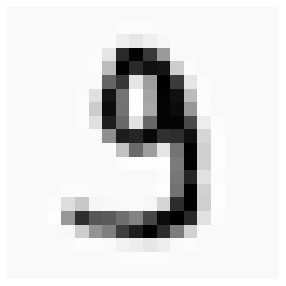

In [43]:
indices = np.random.permutation(m)
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    displayData(X[i, :], figsize=(5, 5))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')